In [1]:
from array import array
import numpy as np
import struct
import matplotlib.pyplot as plt
from typing import Dict, List
import random
from multiprocessing import Pool

f1 = open("./archive/train-images.idx3-ubyte", "rb")
struct.unpack(">IIII", f1.read(16))
imgs1 = np.array(array("B", f1.read()), dtype=np.uint32).reshape((-1, 28, 28))

f2 = open("archive/t10k-images.idx3-ubyte", "rb")
struct.unpack(">IIII", f2.read(16))
imgs2 = np.array(array("B", f2.read()), dtype=np.uint32).reshape((-1, 28, 28))

imgs = np.concat((imgs1, imgs2), axis=0)
print(imgs.shape)

(70000, 28, 28)


(70000, 28, 28)


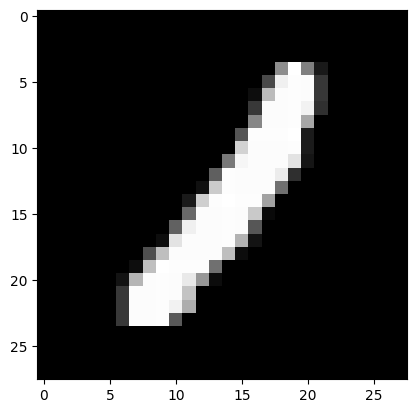

In [2]:
from array import array
import numpy as np
import struct
import matplotlib.pyplot as plt
from typing import Dict

f1 = open("archive/train-images.idx3-ubyte", "rb")
struct.unpack(">IIII", f1.read(16))
imgs1 = np.array(array("B", f1.read())).reshape((-1, 28, 28))

f2 = open("archive/t10k-images.idx3-ubyte", "rb")
struct.unpack(">IIII", f2.read(16))
imgs2 = np.array(array("B", f2.read())).reshape((-1, 28, 28))

imgs = np.concat((imgs1, imgs2), axis=0)
print(imgs.shape)

plt.imshow(random.choice(imgs), cmap="gray")
plt.show()

In [5]:
xs = np.array([[i for i in range(28)] for _ in range(28)])
ys = np.array([[j for _ in range(28)] for j in range(28)])

def atomize(image):
    nonzero = np.nonzero(image)
    idx = random.randint(0, len(nonzero[0])-1)
    y, x = nonzero[0][idx], nonzero[1][idx]

    r = random.randint(3, 6)

    ins = ((xs - x) ** 2 + (ys - y) ** 2) ** 0.5 <= r
    
    return np.multiply(image, ins)

atoms = random.choices(list(imgs), k=1000000)
atoms = Pool(processes=8).map(atomize, atoms)